In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random

# ignore all warnings
import warnings
warnings.filterwarnings("ignore")


# import data
train_set= pd.read_csv('./Data/train.csv', index_col= 'id')
test_set= pd.read_csv('./Data/test.csv', index_col= 'id')


In [2]:
# store all duplicated columns
duplicated_cols_dict= {}
duplicated_cols_list_full = []


# THIS FUNCTION is to drop all duplicates columns
for i, col in enumerate(train_set.columns):
    duplicated_cols_list= []
    # if the col is already one of the keys
    # then skip
    if col in duplicated_cols_list_full:
        continue
    for c in train_set.columns:
        if (train_set[col].equals(train_set[c])):
            duplicated_cols_list.append(c)
            duplicated_cols_list_full.append(c)
        
           
    if (len(duplicated_cols_list) > 1):
        duplicated_cols_dict[col] = duplicated_cols_list   

from matplotlib.cbook import flatten

# determine duplicated columns to drop
drop_cols = set(list(flatten(list(duplicated_cols_dict.values())))) - set(duplicated_cols_dict.keys())

In [3]:
# drop the duplicates

train_set= train_set.drop(drop_cols, axis= 1)
test_set= test_set.drop(drop_cols, axis= 1)

In [4]:
cols_Vincent = train_set.columns[:int(len(train_set.columns)/2)]
cols_Duong = train_set.columns[int(len(train_set.columns)/2):]

Text(0.5, 1.0, 'Percentages of missing values in each column')

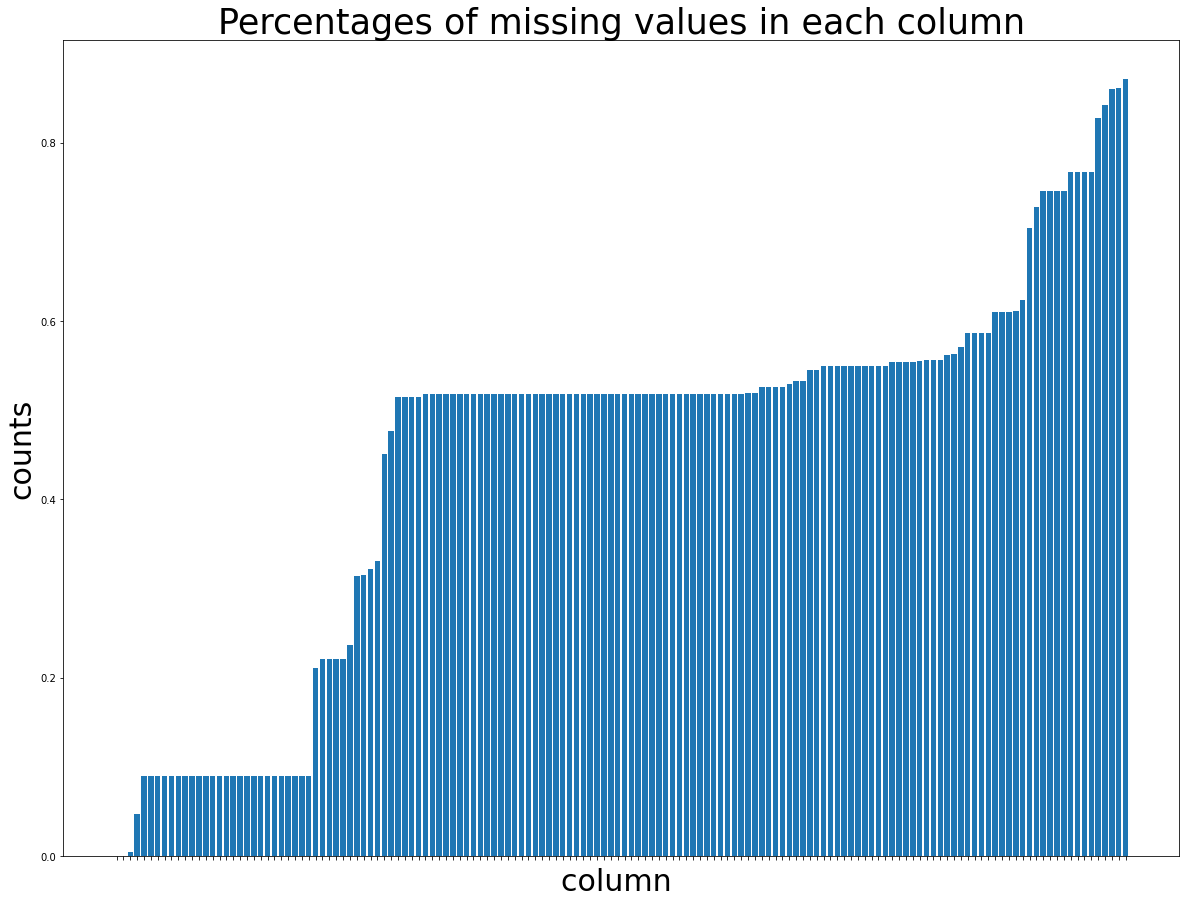

In [5]:
na_counts= train_set.isna().sum().sort_values()
fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(train_set)

ax.bar(na_counts.index,na_counts.values/total_samples)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("counts", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Percentages of missing values in each column", fontsize= 35)

In [6]:
train_set.describe()

,label,Field_3,Field_10,Field_13,Field_19,Field_20,Field_21,Field_22,Field_23,Field_27,...,partner4_L,partner5_A,partner5_D,partner5_G,num_of_phone,Field_78,Field_79,Field_80,Field_81,Field_82
count,53030.000000,25564.000000,25564.000000,25564.0,25564.000000,2.556400e+04,25564.000000,25564.000000,25564.000000,2.556400e+04,...,48283.000000,48283.000000,48283.000000,48283.000000,50518.000000,36397.00000,27782.000000,36320.000000,35981.000000,53030.000000
mean,0.316726,1.538687,1.096542,1.0,0.267022,3.603181e+06,4.485331,0.999452,31.472540,2.252840e+05,...,0.306464,0.254334,0.000124,0.000041,1.087236,20.80144,30.911307,-1.793163,-32.149412,1.668659
std,0.465204,0.498511,0.332593,0.0,0.835968,2.282034e+06,0.281697,0.053069,46.238001,8.423081e+05,...,0.461030,0.435491,0.011147,0.006436,0.297815,40.10993,35.968215,32.176041,63.442452,1.090910
min,0.000000,1.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1.000000,-267.00000,0.000000,-267.000000,-290.000000,1.000000
25%,0.000000,1.000000,1.000000,1.0,0.000000,1.490000e+06,4.500000,1.000000,1.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1.000000,4.00000,5.326888,-5.600000,-69.000000,1.000000
50%,0.000000,2.000000,1.000000,1.0,0.000000,3.801000e+06,4.500000,1.000000,14.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1.000000,16.00000,15.556349,2.086957,0.000000,1.000000
75%,1.000000,2.000000,1.000000,1.0,0.000000,4.500000e+06,4.500000,1.000000,40.000000,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,1.000000,36.00000,46.013087,9.500000,1.000000,2.000000
max,1.000000,2.000000,5.000000,1.0,6.864000,2.980000e+07,6.000000,2.000000,464.000000,2.000000e+07,...,1.000000,1.000000,1.000000,1.000000,5.000000,242.00000,325.976226,238.000000,238.000000,4.000000


In [7]:
print ("Labels count")
train_set.label.value_counts()

Labels count


0    36234
1    16796
Name: label, dtype: int64

Text(0.5, 1.0, 'Correlation with labels')

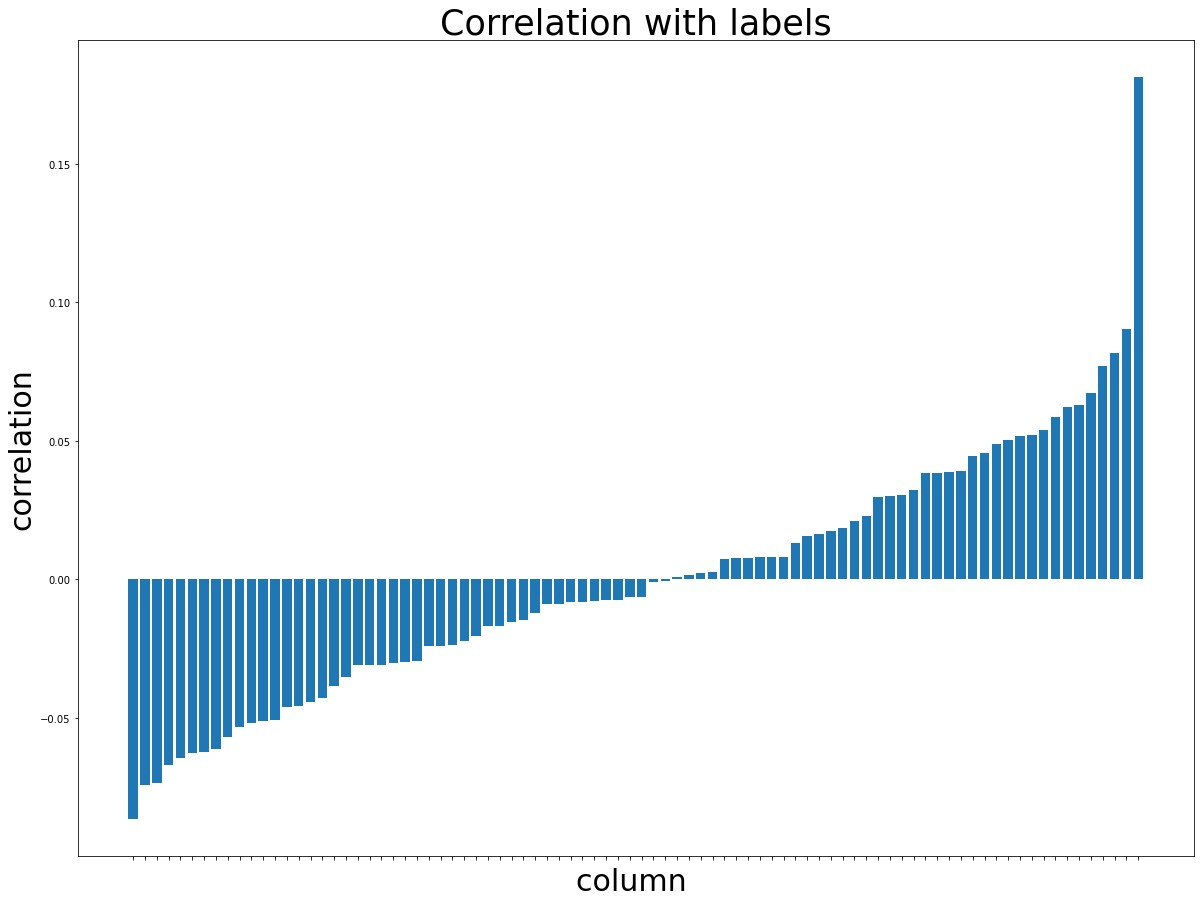

In [8]:
corrs = train_set.corr()['label'].sort_values()
# exclude nan corrs
corrs = corrs[corrs.values < 1]

fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(train_set)

ax.bar(corrs.index,corrs.values)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("correlation", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Correlation with labels", fontsize= 35)

## Duong's part

In [263]:
def is_cat(df, col, cutoff_cat = 500):
    """
    cutoff_cat: value to determine 
    """
    if (len(df[col].value_counts().index) < cutoff_cat):
        return True
    else:
        return False

In [264]:
def fill_numeric_var(df, col, std= True, round_up= True, seed= 76, cuttoff_skewness= 0.2):
    
    from numpy import random
    import scipy
    
    random.seed(seed)

    # if skewness > cuttoff_skewness 
    skewness = scipy.stats.skew(data_Duong[col].values, nan_policy= 'omit').data
    
    if (skewness > cuttoff_skewness):
        mean_or_median = 'median'
    else:
        mean_or_median = 'mean'
    
    
    if (mean_or_median == 'median'):
        col_median = df[col].median()
    else:
        col_median = df[col].mean()
    
    
    
    if (std == True):
        col_std = df[col].std()
    else:
        col_std = 0

    col_random= col_median + col_std*random.randn(len(df))
    # if want to round up to interger
    if (round_up == True):
        
        col_random= np.round(col_random)

    print ("skewess =", skewness, ". Fill NAs with", mean_or_median)
    # start fill in nulls
    col_random = np.where(col_random <0, 0, col_random)
    df[col] = np.where(df[col].isnull(), col_random, df[col])
    
    # TODO: return
    

In [265]:
def fill_cat_var(df, col_name, seed= 76):
    random.seed(seed)
    for name in col_name:
        info = df[name].value_counts()/df[name].value_counts().sum()
        random_val = random.choice(info.index, size= len(df), p = info.values)
        df[name] = np.where(df[name].isnull(), random_val, df[name])

In [314]:
data_Duong = train_set[cols_Duong].copy()

#data_Duong['label']= train_set['label'].values

In [315]:

from datetime import datetime

data_Duong['E_endDate'] = data_Duong['E_endDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['E_startDate'] = data_Duong['E_startDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))


data_Duong['F_endDate'] = data_Duong['F_endDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['F_startDate'] = data_Duong['F_startDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['G_startDate'] = data_Duong['G_startDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['G_endDate'] = data_Duong['G_endDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))               


data_Duong['A_endDate'] = data_Duong['A_endDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['A_startDate'] = data_Duong['A_startDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))  

data_Duong['E_diff_date']= (data_Duong['E_endDate'] - data_Duong['E_startDate']).dt.days

data_Duong['F_diff_date']= (data_Duong['F_endDate'] - data_Duong['F_startDate']).dt.days

data_Duong['G_diff_date']= (data_Duong['G_endDate'] - data_Duong['G_startDate']).dt.days

data_Duong['A_diff_date']= (data_Duong['A_endDate'] - data_Duong['A_startDate']).dt.days

In [316]:
data_Duong.drop(['E_endDate', 'E_startDate', 'F_endDate', 'F_startDate', 'G_endDate', 'G_startDate', 'A_endDate', 'A_startDate'],\
                    axis= 1, inplace= True)

In [317]:
useless_cols = ['currentLocationLocationId', 'currentLocationLatitude', 
                'currentLocationLongitude', 'homeTownLocationId', 
                'homeTownLatitude', 'homeTownLongitude',
                'data.basic_info.locale', 'currentLocationCity',
                'currentLocationCountry', 'currentLocationName', 
                'currentLocationState', 'homeTownCity', 
                'homeTownCountry', 'homeTownName', 'homeTownState']

data_Duong.drop(useless_cols, axis= 1, inplace= True)

In [310]:

        
for col in data_Duong.columns:
    print (data_Duong[col].value_counts(dropna=False))

NaN       29779
male      13775
female     9476
Name: info_social_sex, dtype: int64
NaN       29130
0.0       18335
13.0         35
47.0         30
30.0         29
          ...  
1817.0        1
1056.0        1
620.0         1
1220.0        1
796.0         1
Name: subscriberCount, Length: 1526, dtype: int64
NaN    32364
5.0    11696
1.0     3339
2.0     2401
3.0     1828
4.0     1402
Name: topFriends, dtype: int64
2.0     7800
3.0     7693
4.0     6565
1.0     6524
0.0     5613
5.0     4967
NaN     4753
6.0     3499
7.0     2333
8.0     1365
9.0      864
10.0     523
11.0     279
12.0     142
13.0      60
14.0      27
15.0      14
16.0       6
17.0       2
19.0       1
Name: numOrg, dtype: int64
NaN    27914
1.0    20414
2.0     3922
3.0      672
4.0      101
5.0        6
6.0        1
Name: F_numOrg, dtype: int64
NaN     27914
1.0     17532
2.0      5102
3.0      1647
4.0       522
5.0       181
6.0        84
7.0        22
8.0        10
9.0         7
12.0        2
10.0        2
16.0  

In [318]:
for col in data_Duong.columns:
    #print (col, )
    if is_cat(data_Duong, col):
        fill_cat_var(data_Duong, [col])
    else:
        fill_numeric_var(data_Duong, col)
        

skewess = 57.69614927723232 . Fill NAs with median
skewess = 1.8436283943993048 . Fill NAs with median
skewess = -1.8324515728037627 . Fill NAs with mean


In [319]:
data_Duong.to_csv("/home/mangxu/MachineLearning/CreditScoreChallenge/Data/data_Duong_filled.csv")

In [269]:
data_Duong.head()

,info_social_sex,subscriberCount,currentLocationLocationId,currentLocationLatitude,currentLocationLongitude,homeTownLocationId,homeTownLatitude,homeTownLongitude,data.basic_info.locale,currentLocationCity,...,Field_78,Field_79,Field_80,Field_81,Field_82,label,E_diff_date,F_diff_date,G_diff_date,A_diff_date
id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,1,0 days,0 days,0 days,67 days
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,0 days,0 days,0 days,0 days
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.0,10.769445,6.466667,0.0,2,0,24 days,0 days,0 days,47 days
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.0,10.769445,6.466667,0.0,3,0,0 days,0 days,0 days,0 days
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.0,10.769445,6.466667,0.0,3,1,0 days,0 days,0 days,0 days


Text(0.5, 1.0, 'Percentages of missing values in each column')

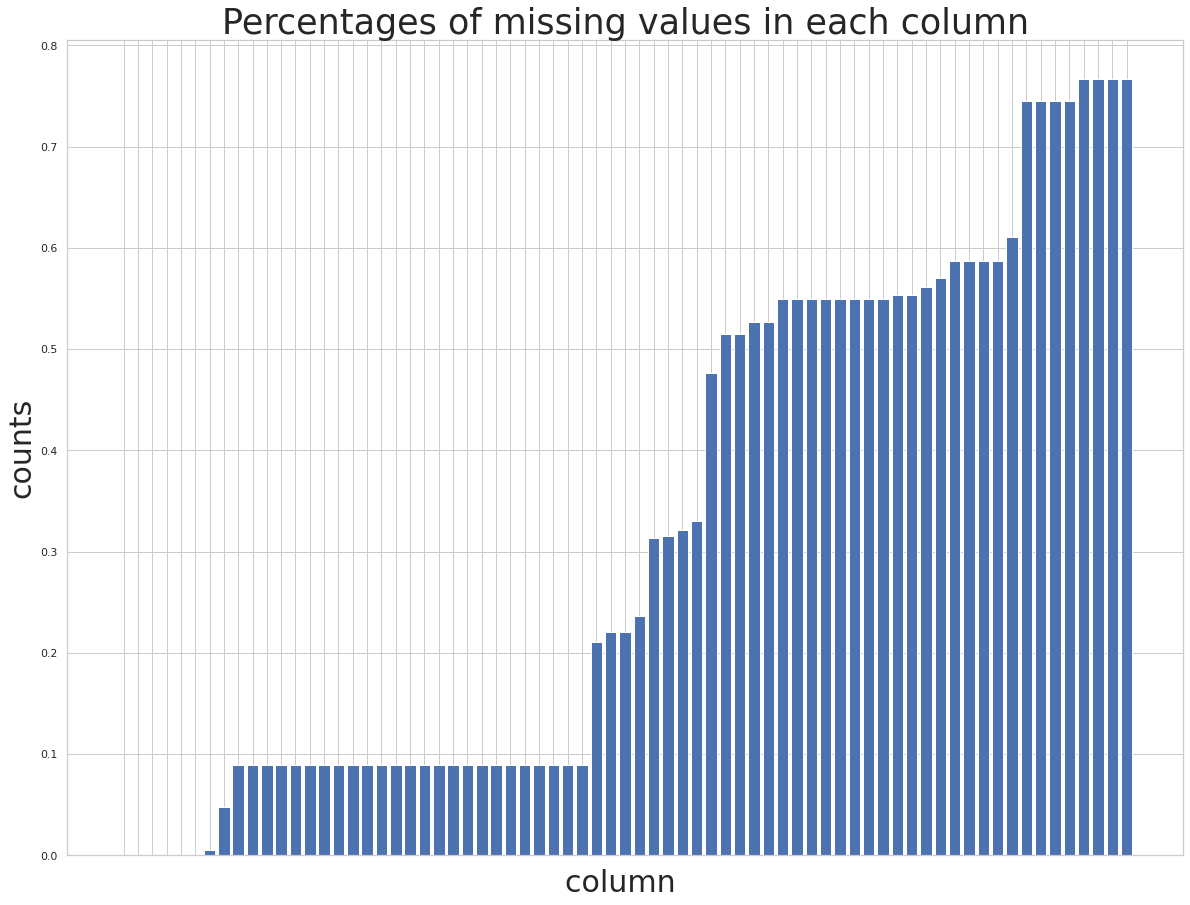

In [270]:
na_counts= data_Duong.isna().sum().sort_values()
fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(data_Duong)

ax.bar(na_counts.index,na_counts.values/total_samples)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("counts", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Percentages of missing values in each column", fontsize= 35)

Text(0.5, 1.0, 'Correlation with labels')

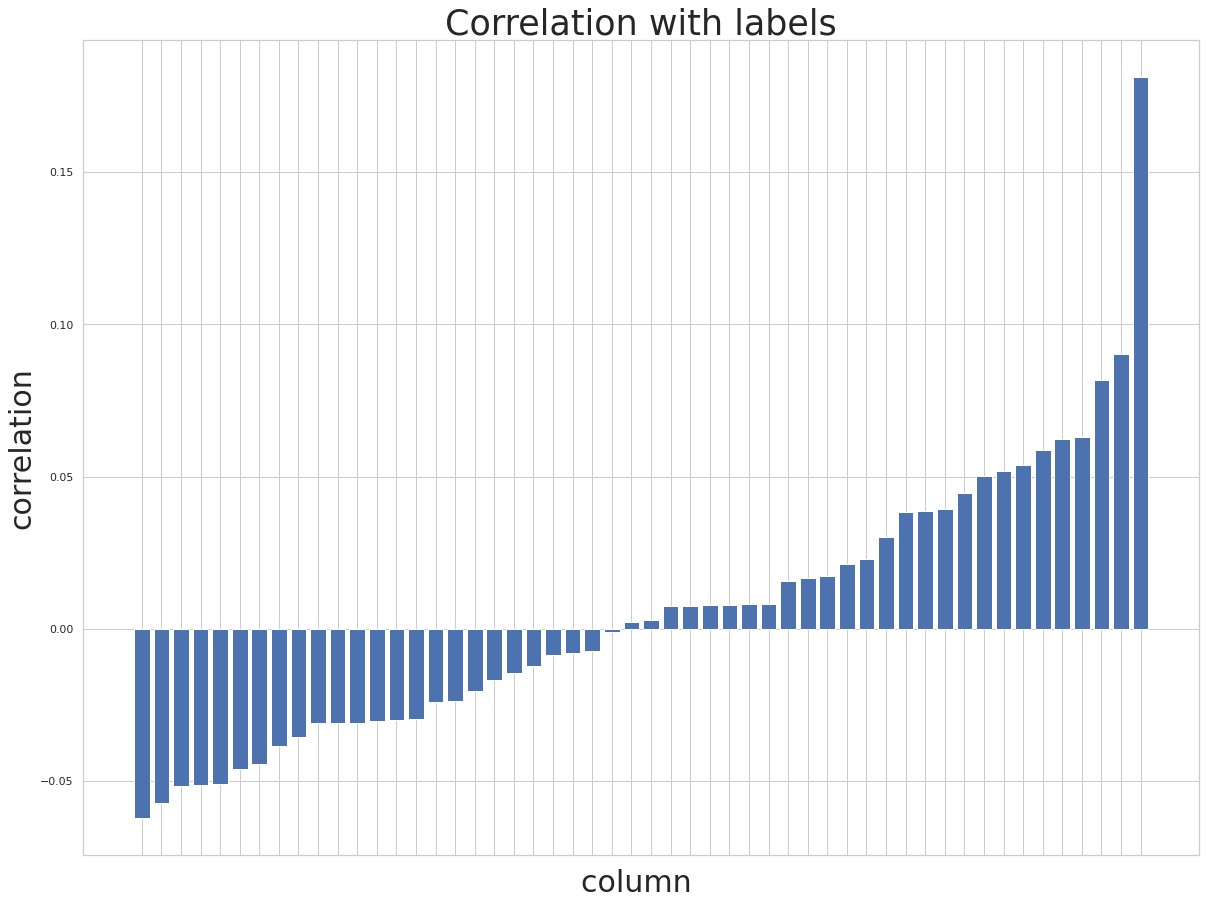

In [271]:
corrs = data_Duong.corr()['label'].sort_values()
# exclude nan corrs
corrs = corrs[corrs.values < 1]

fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(data_Duong)

ax.bar(corrs.index, corrs.values)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("correlation", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Correlation with labels", fontsize= 35)

### Drop columns about geological info

In [272]:
useless_cols = ['currentLocationLocationId', 'currentLocationLatitude', 
                'currentLocationLongitude', 'homeTownLocationId', 
                'homeTownLatitude', 'homeTownLongitude',
                'data.basic_info.locale', 'currentLocationCity',
                'currentLocationCountry', 'currentLocationName', 
                'currentLocationState', 'homeTownCity', 
                'homeTownCountry', 'homeTownName', 'homeTownState']

data_Duong.drop(useless_cols, axis= 1, inplace= True)

### For info_social_sex column:

In [221]:
label_by_info_social_sex = data_Duong.groupby(['label'])\
                ['info_social_sex'].value_counts()
df = pd.DataFrame(label_by_info_social_sex).\
    rename({'info_social_sex':'counts'}, axis=1).reset_index()

### Female has a slightly higher chance of having label 0.
### For the existing values, there are more male than female customers.

Text(0.5, 1.0, 'pct of Info social sex by label')

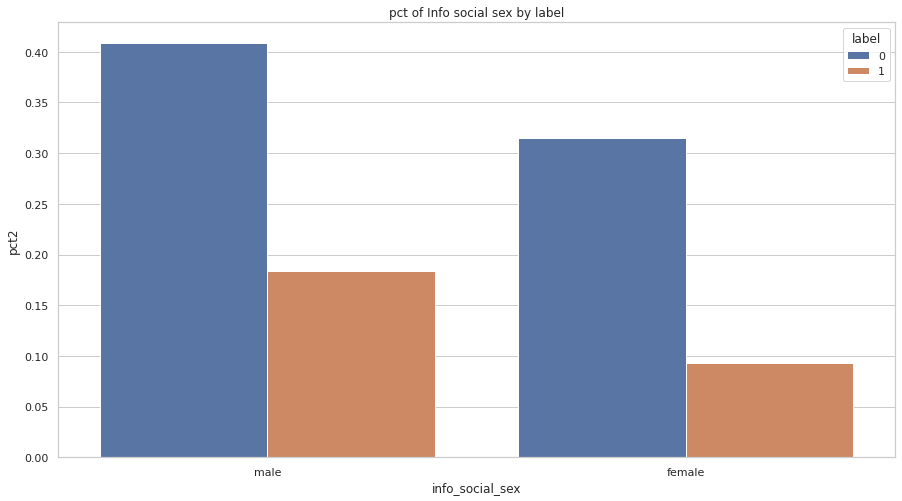

In [222]:
df['pct2'] = df['counts']/df['counts'].sum()

import seaborn as sns

fig, ax = plt.subplots(figsize= (15,8))
sns.barplot(x= 'info_social_sex', y = 'pct2', \
            hue= 'label', data= df, ax=ax)

ax.set_title("pct of Info social sex by label")

In [223]:
print ("percentages of male and female in column info_social_sex:")
info_social_sex_pct_original = data_Duong.info_social_sex.value_counts()/data_Duong.info_social_sex.value_counts().sum()
info_social_sex_pct_original

percentages of male and female in column info_social_sex:


male      0.592448
female    0.407552
Name: info_social_sex, dtype: float64

In [224]:
info_social_sex_pct_original

male      0.592448
female    0.407552
Name: info_social_sex, dtype: float64

### We'll fill in missing values with 60% male and 40% female

In [225]:
fill_cat_var(data_Duong, ['info_social_sex'])

In [226]:
print ("After filling all NAs...")
data_Duong['info_social_sex'].value_counts()/data_Duong['info_social_sex'].value_counts().sum()

After filling all NAs...


male      0.592118
female    0.407882
Name: info_social_sex, dtype: float64

## subscriberCount column
### Plot its distributions

### A lot of missing values

In [227]:
data_Duong.subscriberCount.value_counts(dropna= False)

NaN       29130
0.0       18335
13.0         35
47.0         30
30.0         29
          ...  
1817.0        1
1056.0        1
620.0         1
1220.0        1
796.0         1
Name: subscriberCount, Length: 1526, dtype: int64

## If subscriberCount > 60,000 then label = 0
## We can use it as a factor to automatically fill in label later


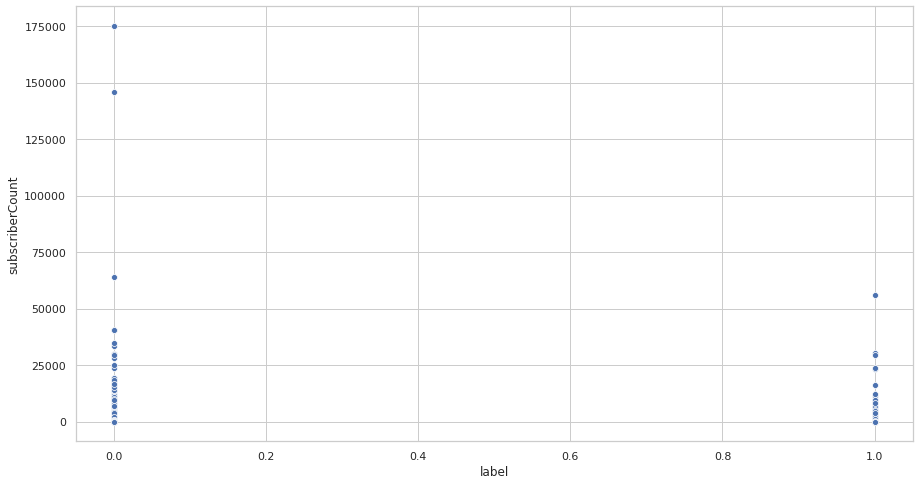

In [228]:
sns.scatterplot(data_Duong.label, data_Duong.subscriberCount)

### it seems like the more subsciber counts, the more likely its label will be 0

Text(0.5, 0.98, 'box plots of labels based on subscriberCount')

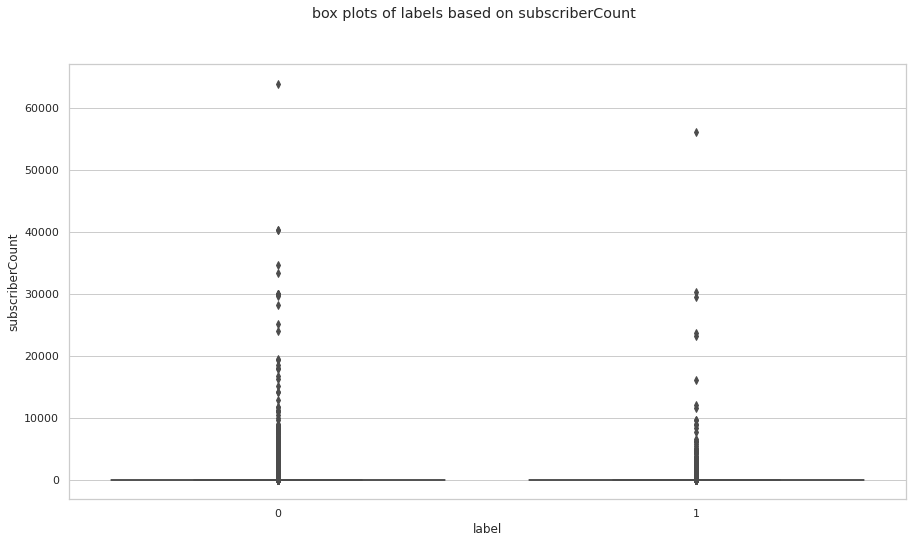

In [229]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (15,8)

sns.boxplot(x= 'label', y= 'subscriberCount', data= data_Duong[data_Duong.subscriberCount <100000])
plt.suptitle("box plots of labels based on subscriberCount")

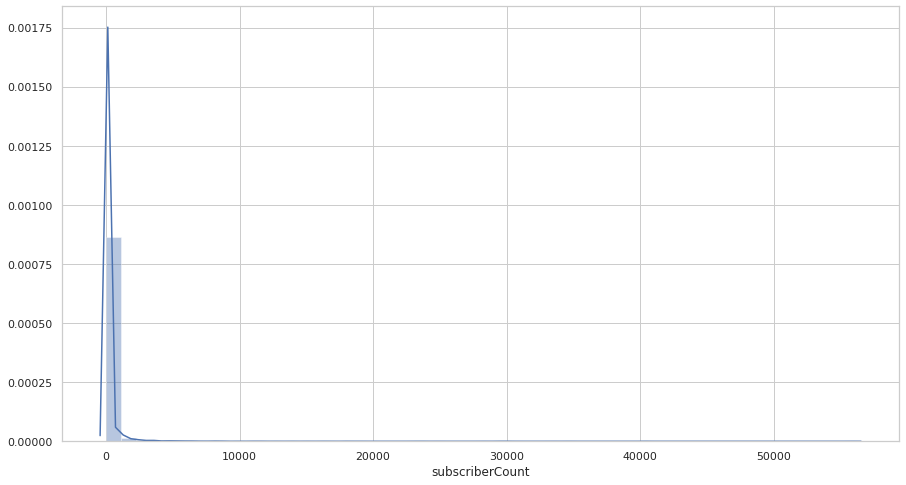

In [230]:
sns.distplot(data_Duong[data_Duong.subscriberCount < 60000].subscriberCount)

## Fill in NAs of subscriberCount with median and std


In [231]:
fill_null_with_median(data_Duong, 'subscriberCount')

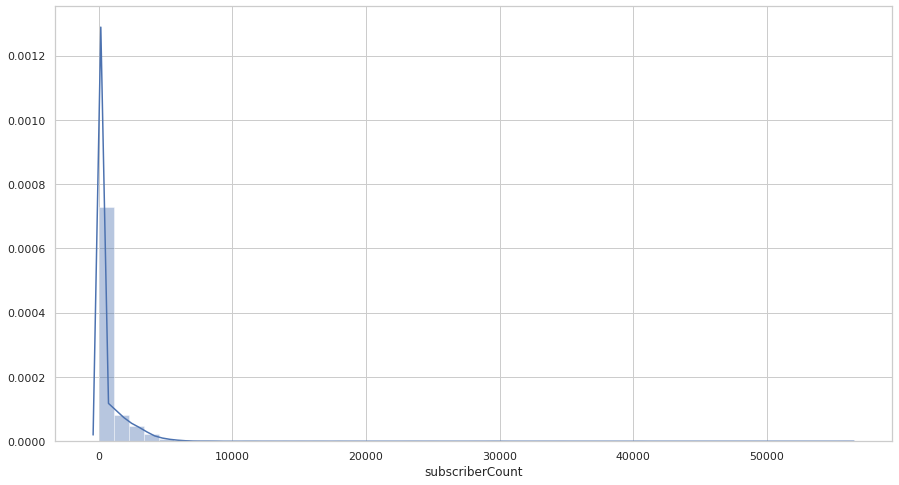

In [232]:
sns.distplot(data_Duong[data_Duong.subscriberCount < 60000].subscriberCount)

# COLUMN TOPFRIENDS

In [233]:
label_by_topFriends = data_Duong.groupby('label')['topFriends'].\
        value_counts().sort_index()
df_label_by_topFriends= pd.DataFrame(label_by_topFriends).\
        rename({'topFriends':'counts'}, axis=1).reset_index()

## most samples has topFriends= 5

Text(0.5, 1.0, 'Counts topFriends by label')

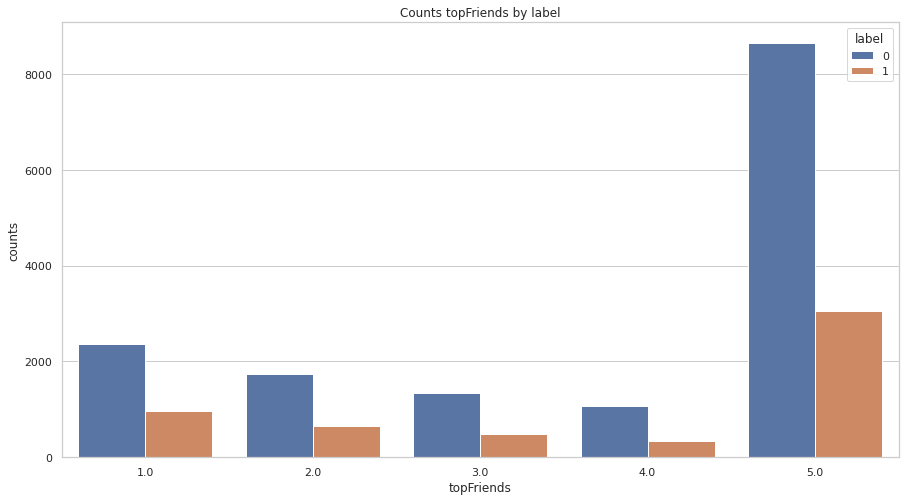

In [234]:
fig, ax = plt.subplots(figsize= (15,8))
sns.barplot(x= 'topFriends', y = 'counts', \
            hue= 'label', data= df_label_by_topFriends, ax=ax)


ax.set_title("Counts topFriends by label")

Text(0.5, 1.0, 'percentage of labels by group of topFriends by label')

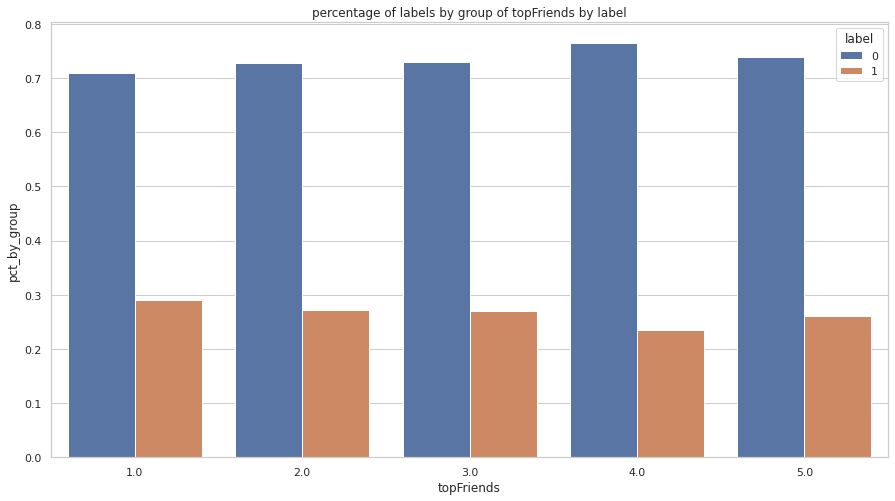

In [235]:
df_label_by_topFriends['pct_by_group'] = df_label_by_topFriends.counts/\
        np.array(list(df_label_by_topFriends.groupby('topFriends').sum()['counts'].values)*2)

fig, ax = plt.subplots(figsize= (15,8))
sns.barplot(x= 'topFriends', y = 'pct_by_group', \
            hue= 'label', data= df_label_by_topFriends, ax=ax)

ax.set_title("percentage of labels by group of topFriends by label")

## Looks like most group will have the same proportions of label 0 and 1.

## fill in missing data randomly based on proportions of topFriends "categories" (0-5)

In [236]:
fill_cat_var(data_Duong, ['topFriends'])

# COLUMN numOrg

(array([5.613e+03, 6.524e+03, 7.800e+03, 7.693e+03, 6.565e+03, 4.967e+03,
        3.499e+03, 2.333e+03, 1.365e+03, 8.640e+02, 5.230e+02, 2.790e+02,
        1.420e+02, 6.000e+01, 2.700e+01, 1.400e+01, 6.000e+00, 2.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 18 Patch objects>)

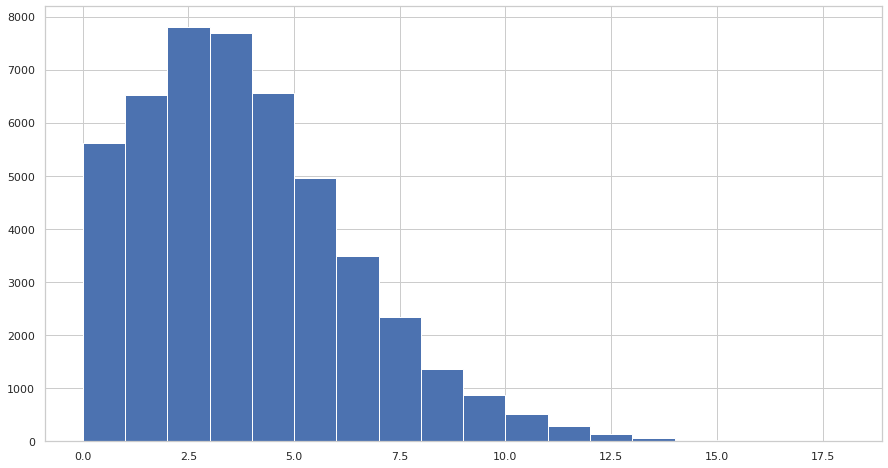

In [237]:
plt.hist(data_Duong.numOrg, bins= range(0, int(data_Duong.numOrg.max()), 1))

## Looks skewed. Fill with median

In [245]:
fill_numeric_var(data_Duong, 'numOrg')

skewess = 1.0146120605510798 . Fill NAs with median


In [248]:
data_Duong.F_numOrg.value_counts()

1.0    39287
2.0     8538
0.0     4383
3.0      714
4.0      101
5.0        6
6.0        1
Name: F_numOrg, dtype: int64

In [246]:
data_Duong.columns

Index(['info_social_sex', 'subscriberCount', 'topFriends', 'numOrg',
       'F_numOrg', 'F_numQuery', 'E_numOrg', 'E_numQuery', 'C_numOrg',
       'C_numQuery', 'C_startDate', 'C_endDate', 'G_numOrg', 'G_numQuery',
       'A_numOrg', 'A_numQuery', 'summary_6m', 'summary_3m', 'summary_1m',
       'summary_1w', 'partner0_A', 'partner0_B', 'partner0_C', 'partner0_D',
       'partner0_E', 'partner0_F', 'partner0_G', 'partner0_H', 'partner1_A',
       'partner1_C', 'partner1_G', 'partner1_H', 'partner2_A', 'partner2_C',
       'partner2_D', 'partner2_F', 'partner2_H', 'partner3_A', 'partner3_D',
       'partner3_E', 'partner4_L', 'partner5_A', 'partner5_D', 'partner5_G',
       'brief', 'num_of_phone', 'Field_78', 'Field_79', 'Field_80', 'Field_81',
       'Field_82', 'label', 'E_diff_date', 'F_diff_date', 'G_diff_date',
       'A_diff_date'],
      dtype='object')

In [247]:
fill_numeric_var(data_Duong, 'F_numOrg')

skewess = 1.0146120605510798 . Fill NAs with median


In [259]:
len(data_Duong.F_numOrg.value_counts().index) > 500

False

### After filling nulls

(array([1.2750e+03, 9.2930e+03, 1.1014e+04, 1.0724e+04, 8.4200e+03,
        5.5440e+03, 3.4140e+03, 1.7290e+03, 8.7600e+02, 4.3700e+02,
        1.8100e+02, 7.6000e+01, 3.0000e+01, 1.4000e+01, 3.0000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Patch objects>)

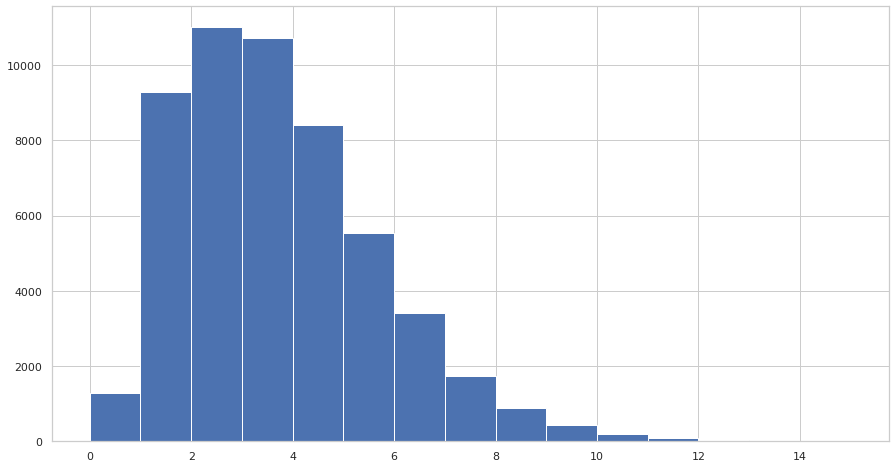

In [118]:
plt.hist(data_Duong.A_numOrg, bins= range(0, 16, 1))

In [ ]:
plt.hist(data_Duong.F_numQuery)

In [ ]:
data_Duong.columns

# create custom columns

### column diff_start_end_date = diff between E_startDate and E_endDate

In [ ]:
from datetime import datetime

data_Duong['E_endDate'] = data_Duong['E_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['E_startDate'] = data_Duong['E_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))


data_Duong['F_endDate'] = data_Duong['F_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['F_startDate'] = data_Duong['F_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['G_startDate'] = data_Duong['G_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['G_endDate'] = data_Duong['G_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))               


data_Duong['A_endDate'] = data_Duong['A_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['A_startDate'] = data_Duong['A_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))  

data_Duong['E_diff_date']= data_Duong['E_endDate'] - data_Duong['E_startDate']

data_Duong['F_diff_date']= data_Duong['F_endDate'] - data_Duong['F_startDate']

data_Duong['G_diff_date']= data_Duong['G_endDate'] - data_Duong['G_startDate']

data_Duong['A_diff_date']= data_Duong['A_endDate'] - data_Duong['A_startDate']

## *letter*_diff_date = diff between *letter*_startDate and *letter*_endDate

In [ ]:
data_Duong[['E_endDate', 'F_endDate']]

In [ ]:
train_set.Field_1

In [ ]:
data_Duong['E_diff_date']= data_Duong['E_endDate'] - data_Duong['E_startDate']

data_Duong['F_diff_date']= data_Duong['F_endDate'] - data_Duong['F_startDate']

data_Duong['G_diff_date']= data_Duong['G_endDate'] - data_Duong['G_startDate']

data_Duong['A_diff_date']= data_Duong['A_endDate'] - data_Duong['A_startDate']

In [ ]:
E_diff_date_counts = data_Duong['E_diff_date'].value_counts()

In [ ]:
E_diff_date_counts

In [ ]:
plt.bar(E_diff_date_counts.index, E_diff_date_counts.values)

In [ ]:
for i, col in enumerate(data_Duong.columns):
    print (i+1, "/ Column name:", col)
    print(data_Duong[col].value_counts(dropna=False))

## Explore topfriends

In [ ]:
topFriends_counts

In [ ]:
train_set['E_endDate'].equals(train_set['G_endDate'])

In [ ]:
train_set[['Field_14','Field_16']].drop_duplicates()

In [ ]:
for i in range(10):
    if (i%3 == 0):
        continue
    print (i)